## Group Report

## Introduction

For our data analysis, we will look at the two predictors of resting blood pressure and maximum heart rate. High resting blood pressure has been shown to cause heart disease in several ways, such as left ventricular hypertrophy, which can reduce the function of the heart. 120/80 is the optimal blood pressure of humans. Maximum heart rate achieved during exercise has been demonstrated to be inversely linked to the chances of one developing heart disease as it represents the fitness of one's heart and the ability to handle exercise. Therefore, our question is, how does resting blood pressure and maximum heart rate influence the diagnosis of heart disease, and are they major contributors? 
    
We’re using preprocessed data from the Cleveland database on heart disease,  originally containing 76 attributes, but we chose from a subset of 14. The 14 attributes include ‘age’, ‘sex’, ‘cp’ or chest pain, ‘trestbps’ or resting blood pressure on admission to the hospital, ‘chol’ or serum cholesterol, ‘fbs’ or fasting blood sugar 120 mg/dl, ‘restecg’ or resting electrocardiographic results, ‘thalac’ or maximum heart rate achieved, ‘exang’ or exercise induced angina, ’oldpeak’ or ST depression induced by exercise relative to rest, ‘slope’ the slope of the peak exercise ST segment, ‘ca’ or number of major vessels (0-3) colored by fluorosopy, ‘thal’: 3 = normal; 6 = fixed defect; 7 = reversible defect, and ‘num’ or diagnosis of heart disease. 


## Methods and Results

### Preprocessing and exploratory data analysis

#### Loading libraries

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
set.seed(999)
options(repr.plot.width = 5, repr.plot.height = 6)

#### Importing the dataset

Using the function read_csv, we read our data from the web. When viewing our dataframe, it was realized that the columns were missing titles, making the data difficult to interpret

In [3]:
#Reading our data into Jupyter
url<-"https://raw.githubusercontent.com/gracieS02/group_proposal_data/main/processed.cleveland.data?token=GHSAT0AAAAAACPGZWSBYOQE5DMJQJJQS2SAZPIZ32A"
download.file(url, "processed_cleveland.csv")

untidy_cleveland<- read_csv("processed_cleveland.csv", col_names=FALSE)


untidy_cleveland



Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1   63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2   67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3   67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
⋮   ⋮  ⋮  ⋮  ⋮   ⋮   ⋮  ⋮  ⋮   ⋮  ⋮   ⋮   ⋮   ⋮   ⋮  
301 57 1  4  130 131 0  0  115 1  1.2 2   1.0 7.0 3  
302 57 0  2  130 236 0  2  174 0  0.0 2   1.0 3.0 1  
303 38 1  3  138 175 0  0  173 0  0.0 1   ?   3.0 0

Figure 1

#### Tidying and cleaning the data

In [4]:
#Renaming the columns to make it easier to read
cleveland_data <- read_csv("processed_cleveland.csv", 
                           col_name = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#Finding our elements that are unknown.
elements <- cleveland_data == "?"

#Replacing these elements (?) with NA
is.na(cleveland_data) <- elements

#Finalizing tidying steps; factoring diagnosis
cleveland_data_cleaned <- mutate(cleveland_data, diagnose = ifelse(is.na(num), NA, (num > 0)), diagnose = as.factor(diagnose))

cleveland_data_cleaned

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal
1   63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0 
2   67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0 
3   67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0 
⋮   ⋮   ⋮   ⋮  ⋮        ⋮    ⋮   ⋮       ⋮       ⋮     ⋮       ⋮     ⋮   ⋮   
301 57  1   4  130      131  0   0       115     1     1.2     2     1.0 7.0 
302 57  0   2  130      236  0   2       174     0     0.0     2     1.0 3.0 
303 38  1   3  138      175  0   0       173     0     0.0     1     NA  3.0 
    num diagnose
1   0   FALSE   
2   2   TRUE    
3   1   TRUE    
⋮   ⋮   ⋮       
301 3   TRUE    
302 1   TRUE    
303 0   FALSE

Figure 2

#### Splitting the data into training and testing sets

In [5]:
#We are splitting the dataframe into training and testing sets, with 75% going to training data.
cleveland_split <- initial_split(cleveland_data_cleaned, prop = 0.75, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

#This is just to count the number of rows per split to ensure it was split correctly
nrow(cleveland_training)
nrow(cleveland_testing)

[1] 226

[1] 77

#### Summarizing the data

In [6]:
#We have summarized the data set by only using the variable means and maxes that are relevant to our data exploration.

cleveland_summary <-cleveland_training |>
                    group_by(diagnose) |>
                    summarize(min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach), 
                              min_trestbps = min(trestbps), max_trestbps = max(trestbps), mean_trestbps = mean(trestbps),
                              number_of_patients = n())
                    

cleveland_summary

diagnose min_thalach max_thalach mean_thalach min_trestbps max_trestbps
1 FALSE    96          194         156.1057      94          180         
2 TRUE     71          195         138.9709     100          192         
  mean_trestbps number_of_patients
1 129.2683      123               
2 134.5728      103

Figure 3

#### Visualizing the relationship between predictors and class (Training set)

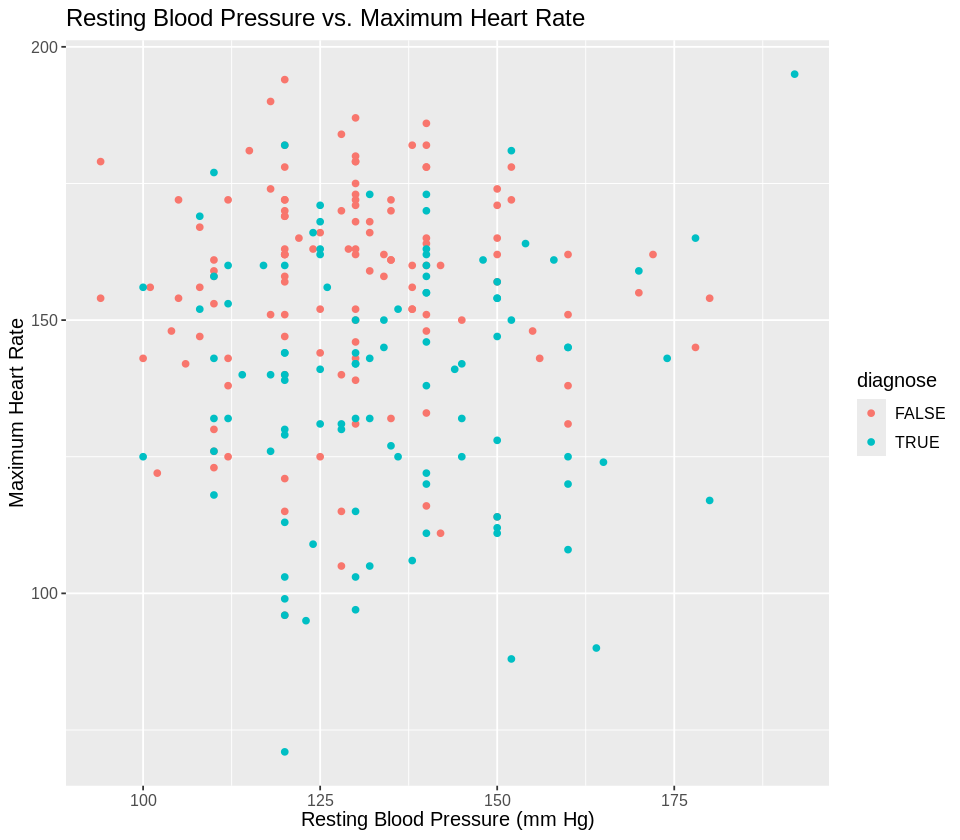

In [7]:
#We have plotted a visualization of the training data to observe the relationship.
options(repr.plot.width = 8, repr.plot.height = 7)

bp_thalach_plot <-ggplot(cleveland_training, aes(x=trestbps, y=thalach, color=diagnose)) +
                  geom_point() +
                  xlab("Resting Blood Pressure (mm Hg)") +
                  ylab("Maximum Heart Rate") +
                  ggtitle("Resting Blood Pressure vs. Maximum Heart Rate") +
                  theme(text = element_text(size = 12)) 
      

bp_thalach_plot


Figure 4

## Finding the best K value

In [8]:
# We are finding the best K value through creating a tuned model, recipe, etc and comparing the accuracy of all potentiaL K models.
set.seed(999)
#A recipe and scaling of data for k nearest neighbours
cleve_recipe <- recipe(diagnose ~ trestbps + thalach, data=cleveland_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors()) 

#The model specification (k nearest neighbours)
cleve_tune <- nearest_neighbor(weight_func="rectangular", neighbors= tune()) |>
            set_engine("kknn") |>
            set_mode("classification") 

#5 fold cross validation
cleve_vfold <- vfold_cv(cleveland_training, v=5, strata = diagnose)

#Fitting the knn model and including the fold validation

grid_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

cleve_fit <- workflow() |>
            add_recipe(cleve_recipe) |>
            add_model(cleve_tune) |>
            tune_grid(resamples=cleve_vfold, grid=grid_vals) |>
            collect_metrics()

accuracy <- cleve_fit |>
            filter(.metric=="accuracy") |>
            arrange(desc(mean)) |>
            select(neighbors, mean)
    

accuracy

#bad accuracy (67.31%): probably because of inappropraite predictors

neighbors mean     
1  86        0.6731225
2  76        0.6646245
3  21        0.6630435
⋮  ⋮         ⋮        
18 11        0.6326087
19  6        0.6021739
20  1        0.4996047

Figure 5

### Visualizing accuracy

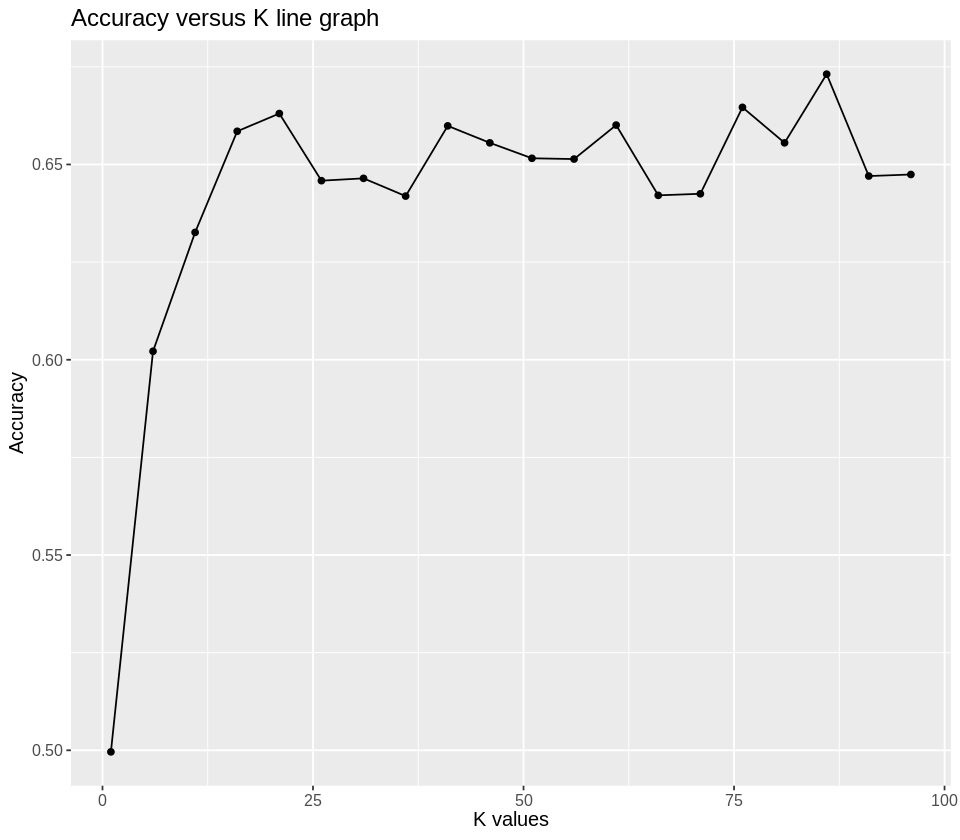

In [9]:
#We have created a plot determining best k value by plotting Accuracy vs K.

accuracy_vs_k <-ggplot(accuracy, aes(x=neighbors, y=mean)) +
                geom_point() + geom_line() +
                labs(x="K values", y="Accuracy") +
                ggtitle("Accuracy versus K line graph") +
                theme(text = element_text(size = 12)) 

accuracy_vs_k

#we pick k=86

Figure 6

### Building the final model

In [10]:
#Now that we have a value for K, we can create our final spec using neighbors = 86. We then fit it to cleveland_training.
cleve_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 86) |>
    set_engine("kknn") |>
    set_mode("classification")

final_fit <- workflow() |>
    add_recipe(cleve_recipe) |>
    add_model(cleve_spec) |>
    fit(data = cleveland_training)

final_fit

#we now have a working model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(86,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3539823
Best kernel: rectangular
Best k: 86

### Evaluating on the testing set

In [11]:
#accuracy
test_predictions <- predict(final_fit, cleveland_testing) |>
  bind_cols(cleveland_testing)

test_predictions |>
  metrics(truth = diagnose, estimate = .pred_class) |>
  filter(.metric == "accuracy")

#precision
test_predictions |>
    precision(truth = diagnose, estimate = .pred_class, event_level="first")

#recall
#recall is a measure of how well the model is able to identify all the positive cases (definition copied from google)
test_predictions |>
    recall(truth = diagnose, estimate = .pred_class, event_level="first")

#print a confusion matrix
confusion <- test_predictions |>
             conf_mat(truth = diagnose, estimate = .pred_class)
confusion

#K=86 model has a precision of 69.81%, and a recall of 90.24%
#our model is 74.03% accurate, and labeled 57/77 observations correctly. It also seems to more likely to underdiagnose(16) than 
#overdiagnose(4).

.metric  .estimator .estimate
1 accuracy binary     0.7402597

.metric   .estimator .estimate
1 precision binary     0.6981132

.metric .estimator .estimate
1 recall  binary     0.902439

          Truth
Prediction FALSE TRUE
     FALSE    37   16
     TRUE      4   20

Figure 7

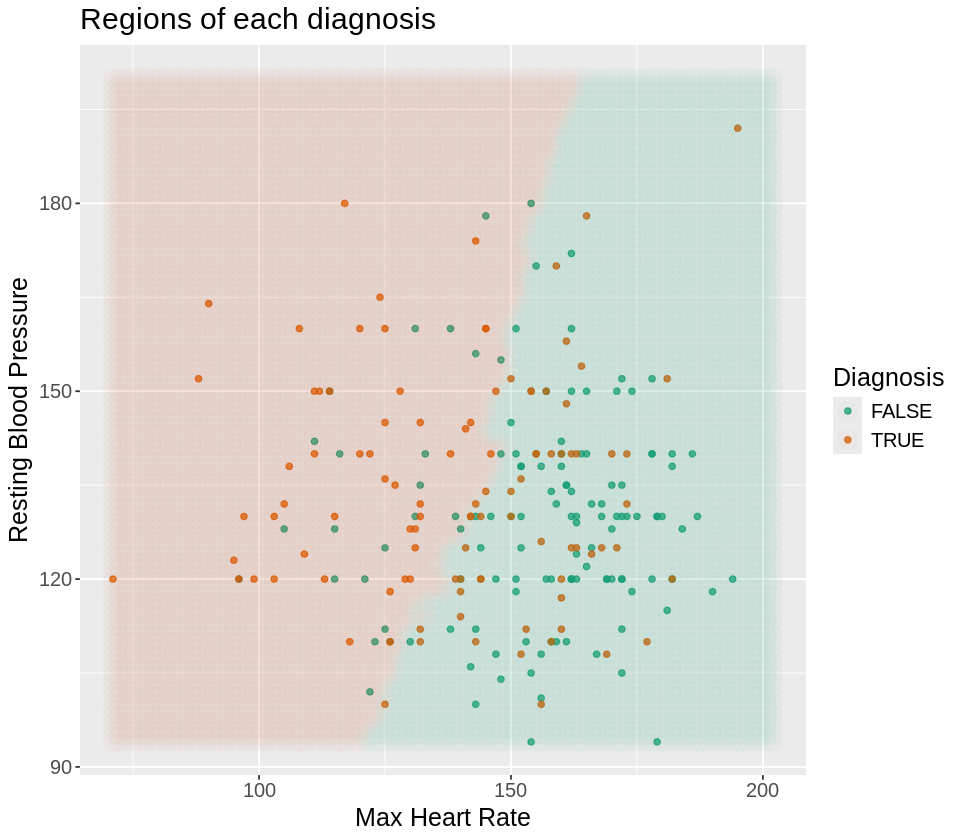

In [12]:
#Checking for overfitting & underfitting

#make the model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 86) |>
    set_engine("kknn")|>
    set_mode("classification")

#combine the model and recipe in a workflow, retrain the classifier with fit
fit <- workflow() |>
    add_recipe(cleve_recipe) |>
    add_model(knn_spec) |>
    fit(data = cleveland_training)

#graph with coloured background to check for overfitting/underfitting

thalach_grid <- seq(min(cleveland_data_cleaned$thalach), 
                max(cleveland_data_cleaned$thalach), 
                length.out = 100)

trestbps_grid <- seq(min(cleveland_data_cleaned$trestbps), 
                max(cleveland_data_cleaned$trestbps), 
                length.out = 100)

asgrid <- as_tibble(expand.grid(thalach = thalach_grid, 
                                trestbps = trestbps_grid))

knnPredGrid <- predict(fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
                    rename(diagnose = .pred_class)

plot_results <- ggplot() + 
                geom_point(data = cleveland_training, 
                mapping = aes(x = thalach, y = trestbps, color = diagnose), 
                alpha = 0.75) +
                geom_point(data = prediction_table, 
                           mapping = aes(x = thalach, 
                           y = trestbps, 
                           color = diagnose), 
                           alpha = 0.02, 
                           size = 5) +
                labs(x = "Max Heart Rate", y = "Resting Blood Pressure", 
                     color = "Diagnosis", 
                     title = "Regions of each diagnosis") +
                scale_color_brewer(palette = "Dark2") +
                theme(text = element_text(size = 15))

plot_results

#neither overfitting nor underfitting (need to add reference)
#reference: https://github.com/ysaleh03/group-29-project/blob/main/group_29_project_proposal.ipynb


Figure 8

## Discussion

## References